In [1]:
from matplotlib import pyplot as plt
import tensorflow as tf
#from tensorflow import keras
#Используем костыль для исправления IntelliSense для keras по гайду:
#https://stackoverflow.com/questions/71000250/import-tensorflow-keras-could-not-be-resolved-after-upgrading-to-tensorflow-2
import keras.api._v2.keras as keras
from keras import layers
from keras import losses
#from keras.datasets import CIFAR100
import numpy as np
import tensorflow_datasets as tfds

C:\Users\PlayerPC\Miniconda3\envs\tf\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()
#(x_train,y_train), (x_test,y_test)=CIFAR100.load_data()
'''print(tfds.load('cifar100', split='train', shuffle_files=True,as_supervised=True))

builder = tfds.builder('cifar100')
info = builder.info
print(info)


x_train, y_train = tfds.as_numpy(tfds.load('cifar100', split='train', shuffle_files=True,as_supervised=True))'''
#x_test, y_test = tfds.as_numpy(tfds.load('cifar100', split='test', shuffle_files=True))
#print(ds)

#from eCIFAR100 import extract_training_samples
#x_train, y_train = extract_training_samples('digits')
#x_train, y_train = extract_training_samples('byclass')
#x_train, y_train = extract_training_samples('letters')

num_classes=100
input_shape = (32, 32, 3)

x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#x_train_l, y_train_l = extract_training_samples('letters')

print()


print("Train X=%s, y=%s"%(x_train.shape,y_train.shape))
#print("Train Letters X=%s, y=%s"%(x_train_l.shape,y_train_l.shape))
#print("Test X=%s, y=%s"%(x_test1.shape,y_test.shape))



print("Train X=%s, y=%s"%(x_train.shape,y_train.shape))
print("Test X=%s, y=%s"%(x_test.shape,y_test.shape))
print(x_test[0].shape)


Train X=(50000, 32, 32, 3, 1), y=(50000, 100)
Train X=(50000, 32, 32, 3, 1), y=(50000, 100)
Test X=(10000, 32, 32, 3, 1), y=(10000, 100)
(32, 32, 3, 1)


In [3]:
model=keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.BatchNormalization(),
        
        layers.Conv2D(32, kernel_size=(5, 5), activation="relu",use_bias=True),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu",use_bias=True),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        #layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu",use_bias=True),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu",use_bias=True),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu",use_bias=True),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu",use_bias=True),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        #layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        #layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]#52 Буквы, 10 цифрф
 )
print(model.output_shape)
print(str(model.summary()))

(None, 100)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 32, 32, 3)        12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                            

In [16]:
model.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=tf.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

In [17]:
#model.fit(x_train,y_train,batch_size=1,epochs=5,shuffle=True)

In [18]:
print("x_train=",x_train.shape,"y_train",y_train.shape)
model.save("saved_model_CNN/CIFAR100_learn_epoch_start.h5")
for i in range(1,6):
    print("Epoch "+str(i))
    model.save('saved_model_CNN/CIFAR100_learn_epoch_start='+str(i)+".h5")
    model.fit(x_train,y_train,batch_size=25,epochs=1,shuffle=True,validation_data=(x_test,y_test))
    #,validation_data=(x_test,y_test)
    
    
    model.save('saved_model_CNN/CIFAR100_learn_epoch_end='+str(i)+".h5")
results=model.evaluate(x_test,y_test,batch_size=50,verbose=2)
print(str(results))
model.save("saved_model_CNN/CIFAR100_learn_done.h5")

x_train= (50000, 32, 32, 3, 1) y_train (50000, 100)
Epoch 1
2000/2000 [==============================] - 29s 14ms/step - loss: 4.6295 - accuracy: 0.0561 - val_loss: 3.8502 - val_accuracy: 0.1251
Epoch 2
2000/2000 [==============================] - 27s 14ms/step - loss: 4.0287 - accuracy: 0.1102 - val_loss: 3.5453 - val_accuracy: 0.1781
Epoch 3
2000/2000 [==============================] - 27s 13ms/step - loss: 3.6952 - accuracy: 0.1541 - val_loss: 3.2424 - val_accuracy: 0.2284
Epoch 4
2000/2000 [==============================] - 28s 14ms/step - loss: 3.4342 - accuracy: 0.1931 - val_loss: 3.0698 - val_accuracy: 0.2603
Epoch 5
2000/2000 [==============================] - 28s 14ms/step - loss: 3.2268 - accuracy: 0.2269 - val_loss: 2.9313 - val_accuracy: 0.2868
200/200 - 1s - loss: 2.9313 - accuracy: 0.2866 - 1s/epoch - 7ms/step
[2.931272268295288, 0.2865999937057495]


In [19]:
#Без dropout было явное переобучение train 90 пртив test 45
#print("x_train=",x_train.shape,"y_train",y_train.shape)
model.save("saved_model_CNN2/CIFAR100_learn_epoch_start.h5")
for i in range(1,10):
    print("Epoch "+str(i))
    model.save('saved_model_CNN2/CIFAR100_learn_epoch_start='+str(i)+".h5")
    model.fit(x_train,y_train,batch_size=25,epochs=1,shuffle=True,validation_data=(x_test,y_test))
    #,validation_data=(x_test,y_test)
    
    
    model.save('saved_model_CNN2/CIFAR100_learn_epoch_end='+str(i)+".h5")
results=model.evaluate(x_test,y_test,batch_size=50,verbose=2)
print(str(results))
model.save("saved_model_CNN2/CIFAR100_learn_done.h5")

Epoch 1
2000/2000 [==============================] - 27s 14ms/step - loss: 3.0588 - accuracy: 0.2562 - val_loss: 2.7402 - val_accuracy: 0.3237
Epoch 2
2000/2000 [==============================] - 27s 13ms/step - loss: 2.9181 - accuracy: 0.2827 - val_loss: 2.6140 - val_accuracy: 0.3431
Epoch 3
2000/2000 [==============================] - 27s 13ms/step - loss: 2.8010 - accuracy: 0.3036 - val_loss: 2.5466 - val_accuracy: 0.3589
Epoch 4
2000/2000 [==============================] - 27s 14ms/step - loss: 2.6945 - accuracy: 0.3243 - val_loss: 2.5266 - val_accuracy: 0.3588
Epoch 5
2000/2000 [==============================] - 27s 13ms/step - loss: 2.6113 - accuracy: 0.3396 - val_loss: 2.4413 - val_accuracy: 0.3773
Epoch 6
2000/2000 [==============================] - 28s 14ms/step - loss: 2.5305 - accuracy: 0.3554 - val_loss: 2.3288 - val_accuracy: 0.4031
Epoch 7
2000/2000 [==============================] - 28s 14ms/step - loss: 2.4589 - accuracy: 0.3719 - val_loss: 2.2814 - val_accuracy: 0.4068

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [6]:
model.load_weights("saved_model_CNN2/CIFAR100_learn_epoch_end=8.h5")
model.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [7]:
#Без dropout было явное переобучение train 90 пртив test 45
#print("x_train=",x_train.shape,"y_train",y_train.shape)
model.save("saved_model_CNN3/CIFAR100_learn_epoch_start.h5")
for i in range(1,3):
    print("Epoch "+str(i))
    model.save('saved_model_CNN3/CIFAR100_learn_epoch_start='+str(i)+".h5")
    model.fit(x_train,y_train,batch_size=25,epochs=1,shuffle=True,validation_data=(x_test,y_test))
    #,validation_data=(x_test,y_test)
    
    
    model.save('saved_model_CNN3/CIFAR100_learn_epoch_end='+str(i)+".h5")
results=model.evaluate(x_test,y_test,batch_size=50,verbose=2)
print(str(results))
model.save("saved_model_CNN3/CIFAR100_learn_done.h5")

Epoch 1
 614/2000 [========>.....................] - ETA: 16s - loss: 3.1998 - accuracy: 0.2230

KeyboardInterrupt: 

In [ ]:
#model.fit(x_train,y_train,batch_size=32,epochs=5)

In [8]:
#model.load_weights("saved_model3/ECIFAR100_learn_epoch_start.h5")

313/313 - 1s - loss: 0.0398 - accuracy: 0.9875 - 1s/epoch - 3ms/step
[0.039796166121959686, 0.987500011920929]
8440
(28, 28, 3)
(28, 28, 1)
1/1 [==============================] - 0s 24ms/step
9


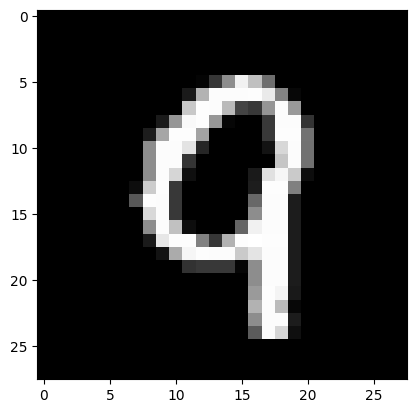

In [12]:
results=model.evaluate(x_test,y_test,batch_size=32,verbose=2)
print(str(results))
value=np.random.randint(0,10000)
print(value)
for id in range(len(y_train)):
    #print(labels[id])
    #break
    #22 - M big
    if(y_train.argmax()==7):
        value=id
        break
        


#print(x_train[value].shape)

single=x_train[value]
image=np.zeros((28,28,3))
print(image.shape)

for y in range(0,image.shape[0]):
    for x in range(0,image.shape[1]):
        for c in range(0,image.shape[2]):
            image[y,x,c]=single[y][x]



print(single.shape)
#print(single)

singleReady=np.zeros((1,28,28))

for y in range(0,image.shape[0]):
    for x in range(0,image.shape[1]):
            singleReady[0][y][x]=single[y][x]

print(model.predict(singleReady,batch_size=1).argmax())

plt.imshow(image)
plt.show()

In [13]:
model.save('saved_model_CNN/CIFAR100_byclass_done.h5')

In [14]:
#results=model.evaluate(x_test,y_test,batch_size=32,verbose=2)
#print(str(results))
#value=np.random.randint(0,10000)

id=22
for v in y_train:
    if(v.argmax()==id):
        print(id)
        ShowImage(v)
        break
        #id+=1
currentIteration=0
'''for v in y_train:
    if(v==id):
        print(id,v)
        ShowImage(v)
        currentIteration+=1
        id+=1    
    if(currentIteration==10):
        break'''


def ShowImage(value:int):
    print(x_train[value].shape)

    single=x_train[value]
    image=np.zeros((28,28,3))
    print(image.shape)

    for y in range(0,image.shape[0]):
        for x in range(0,image.shape[1]):
            for c in range(0,image.shape[2]):
                image[y,x,c]=single[y*28+x]



    #print(single.shape)
    #print(single)

    #singleReady=np.zeros((1,28*28))

    #for y in range(0,image.shape[0]):
    #    for x in range(0,image.shape[1]):
    #            singleReady[0][y*28+x]=single[y*28+x]

    #print(model.predict(singleReady,batch_size=1).argmax())

    plt.imshow(image)
    plt.show()

In [17]:
from PIL import Image
IMG = np.asarray(Image.open('E:/JupyterLab/Tensorflow_FKI_fall_2022/2022.10.07/Segmented/9.png'))

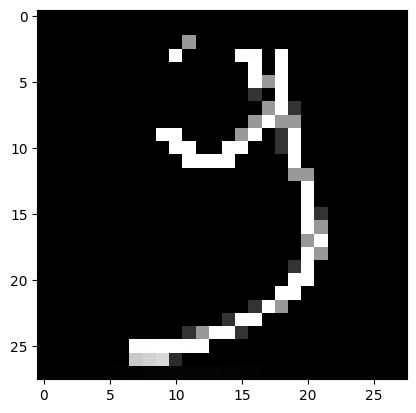

(28, 28, 3)
(1, 28, 28)


In [30]:
plt.imshow(IMG)
plt.show()
print(IMG.shape)

IMG_2=np.zeros((1,28,28),dtype="float32")

for x in range(28):
    for y in range(28):
        IMG_2[0][x][y]=IMG[x][y][0]/255.
print(IMG_2.shape)

In [32]:
print(model.predict(IMG_2,batch_size=1).argmax())

1/1 [==============================] - 0s 26ms/step
3
